# Survey Design to Factor Analysis Notebook

Like anything else even somewhat creative, it pays to not rush in blindly, but rather to spend some time thinking through requirements and figuring about your overall goals. Here are the general steps in survey development:

- Determine the overall purpose of the survey
- Brainstorm the questions you are trying to answer with the survey
- Create survey items that align with your questions
- Format the survey as appropriate for your questions and your audience
- Write scoring and administration rules if needed
- Test out your survey
- Administer your survey

## Once you have all that data from your survey what do you do?

In [47]:
install.packages("vembedr")
library("vembedr")
embed_vimeo("651807175")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpDHhCzY/downloaded_packages


Shiny tags cannot be represented in plain text (need html)

https://vimeo.com/651807175

# Factor Analysis

An important thing to think about when analyzing surveys is how well the items "hang together" and whether you are measuring more than one concept in your survey.  You may ask several questions about a similar broad topic, but is that all one topic, or does it really have some subtopics in it? *Factor analysis* has the answer to these questions and more! The basic goal of factor analysis is to see how items fall together and to see if they group in any particular patterns that make sense logically.

---

## Types of Factor Analysis

There are two broad types of factor analysis: *exploratory factor analysis* and *confirmatory factor analysis*. Exploratory factor analysis, abbreviated *EFA*, is used when you don't really have an inkling of what your data will yield.  You are intrepid explorers, traversing unknown survey data worlds! Confirmatory factor analysis, abbreviated *CFA* (so original!), is either for after you have completed EFA or when you are so confident about what your data holds you feel you can skip the EFA and just want a validation check. You are confirming your thoughts about the data with CFA. An example of when you might proceed straight to CFA is when you have already used a validated, previously studied set of survey items, and just want to make sure that your data is behaving the same way as it did for others.  

The most common type of factor analysis is definitely EFA, and it's a good thing, because it's easier, too! Conducting a CFA is actually a form of structural equation modeling (SEM), and you won't get into that here. However, you will learn how to rock the heck out of an EFA, and that knowledge will take you a long way!

---

## Assumptions of EFA

There are only three assumptions for EFA - yes you heard that right - three! Let the party commence! 

---

### Sample Size 

Although there are many different opinions about sample size for EFA, the safest rule you can follow is to have at least 300 data points. However, you may be able to get away with as few as 150 data points if you have a small number of survey questions you're examining and those survey questions are moderately correlated with each other. 

---

### Absence of Multicollinearity

*Multicollinearity*, or having a lot of overlap between variables, is a problem, because it will make sorting your survey items into distinct groups quite difficult.  Chances are that if your survey items all have really high multicollinearity, then you should have asked fewer survey items, because they are all getting at the same concept! You can test for multicollinearity by running a correlation matrix on all your survey items. If anything correlates with anything else at .9 or higher, than it's got to go, and you'll want to eliminate it from your analysis.  Though that's a good guideline, you may run into situations where lower correlations also cause problems.  You'll be able to catch this by looking at the *determinants*. You can think of determinants as another measure of how well survey items are correlated. When you run a determinant test, you are looking for a value of greater than .00001.    

---

### Some Relationship between Survey Items

Although multicollinearity is to be avoided, it's important that there is some relationship between your survey items. Otherwise, they probably shouldn't be grouped together at all! So you'll also want to scan your correlation matrix for any variable that has multiple correlations with other items of .3 or lower, which is a good indication it's not going to play nicely with the others and should be removed. You can also run a catch-all test to make sure that there is some relation between all the variables - this is *Bartlett's test*, which you will want to be significant, since it tests against an *identity matrix*, or a matrix that assumes no relationship between all variables (correlations of 0 for everything).

---

## Factor Rotation

The other big thing you need to know about EFA before diving in is *factor rotation*.  In order to better see the relationships between your different survey items, you will want to rotate the data.  You can rotate it 90 degrees, which is called *orthogonal rotation* and is really meant for when you theoretically don't think your survey items are related, or you can rotate it with *oblique rotation*, which does not maintain right angles at 90 degrees.  Oblique rotation is when you theoretically believe your survey items should be related. The most common types of orthogonal rotation are *varimax* and *quartimax*.  The most common types of oblique rotation are *oblimin* and *promax*. You don't need to know the mathematical differences between then, and chances are, you will use a process of trial and error in which you'll try at least two different rotation types for each data set.

In the image below, you'll see that Figure A shows off the raw data, which is scattered all over the place.  Figure B, in the middle, shows a type of orthogonal rotation, in which the axes are now turned 90 degrees from where they once were.  And Figure C shows a type of oblique rotation, which also rotates the data, just not at 90 degrees.  In this example, the data remain spread apart (probably because there are only three data points), but in most cases, as you rotate, the data will start to clump together, forming factors.

# Factor Analysis Setup

Now that you understand the basics of factor analysis, you will run one of your own in R!

---

## Load Libraries

You will need to install and load several libraries in order to complete factor analysis in R. You will use ```corpcor``` for correlations, and ```GPArotation``` for the factor analysis proper.  ```psych``` will help you with interpreting the factor loadings, and ```IDPmisc``` can be used to remove missing data.

```{r}
library("corpcor")
library("GPArotation")
library("psych")
library("IDPmisc")
```



In [4]:
## Install packages
install.packages("corpcor")
install.packages("GPArotation")
install.packages("psych")
install.packages("IDPmisc")

## Load Packages
library("corpcor") 
library("GPArotation") 
library("psych") 
library("IDPmisc")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpDHhCzY/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpDHhCzY/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpDHhCzY/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpDHhCzY/downloaded_packages


---

## Load in Data

For this walkthrough, you will  be using **[data from a survey on financial wellbeing](https://repo.exeterlms.com/documents/V2/DataScience/Metrics-Data-Processing/financialWB.zip)**  The codebook is located **[here](https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf)**. Check out the variable list starting on page 5 if you'd like to know what all the survey items are (or at least the ones you'll be working with).

In [5]:
# Load data
financialWB <- read.csv("financialWB.csv")

In [6]:
head(financialWB)

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,⋯,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,10350,2,3,5,5,6,55,3,3,3,⋯,1,4,8,0,0,0,0,1,0,0.3672919
2,7740,1,3,6,6,6,51,2,2,3,⋯,1,2,3,0,0,0,0,2,0,1.3275607
3,13699,1,3,4,3,4,49,3,3,3,⋯,1,4,9,0,0,0,1,2,1,0.8351558
4,7267,1,3,6,6,6,49,3,3,3,⋯,1,3,7,0,0,0,0,1,0,1.4108710
5,7375,1,3,4,4,4,49,3,3,3,⋯,1,2,4,0,0,1,0,4,1,4.2606681
6,10910,1,3,5,7,5,67,5,1,1,⋯,1,2,3,0,0,0,0,2,0,0.7600609


---

## Question Setup

With the data above, you will be determining how a set of questions from the financial wellbeing survey hang together and whether there are any subscales. To do this, you will perform factor analysis.  In factor analysis, there is no x or y variables - you are simply seeing how variables fit together.

---

## Data Wrangling

Before you begin, there is one data wrangling item that needs to take place - you will subset your data.  The function you'll use in R for factor analysis does not allow you to specify variables, so you'll need to trim your data to only the variables you are interested in looking at to begin with. In order to subset, take a look at the data and identify the columns you want to keep. In this case, you want the items that start with ```FWB```. They are contained in columns numbered 8-17.  With the below code, you will only have those columns in your new dataset to use:


In [7]:
# FWB data
financialWB1 <- financialWB[, 8:17]

In [8]:
head(financialWB1)

,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,3,3,3,2,3,2,3,2,4
2,2,2,3,3,3,4,2,2,2,3
3,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3
6,5,1,1,1,1,1,2,5,2,2


In [9]:
# Test Assumptions
## Multicollinearity - looking for things > .9, there are none
FWBmatrix1 <- cor(financialWB1 ) 

print(round(FWBmatrix1, 2))
## Some relationship - look for things < .3 with multiple variables 
### If any look suspect like FS2_3 - we may want to try to leave it out

       FWB1_1 FWB1_2 FWB1_3 FWB1_4 FWB1_5 FWB1_6 FWB2_1 FWB2_2 FWB2_3 FWB2_4
FWB1_1   1.00   0.68  -0.48   0.69  -0.42  -0.44  -0.57   0.65  -0.48  -0.45
FWB1_2   0.68   1.00  -0.48   0.70  -0.36  -0.45  -0.51   0.60  -0.43  -0.41
FWB1_3  -0.48  -0.48   1.00  -0.49   0.53   0.62   0.60  -0.50   0.52   0.55
FWB1_4   0.69   0.70  -0.49   1.00  -0.35  -0.43  -0.50   0.62  -0.46  -0.43
FWB1_5  -0.42  -0.36   0.53  -0.35   1.00   0.47   0.50  -0.41   0.43   0.44
FWB1_6  -0.44  -0.45   0.62  -0.43   0.47   1.00   0.52  -0.45   0.44   0.51
FWB2_1  -0.57  -0.51   0.60  -0.50   0.50   0.52   1.00  -0.60   0.64   0.61
FWB2_2   0.65   0.60  -0.50   0.62  -0.41  -0.45  -0.60   1.00  -0.53  -0.46
FWB2_3  -0.48  -0.43   0.52  -0.46   0.43   0.44   0.64  -0.53   1.00   0.55
FWB2_4  -0.45  -0.41   0.55  -0.43   0.44   0.51   0.61  -0.46   0.55   1.00


In it, you want to look at only half the matrix (remember that the top and bottom halves along the diagonal are mirror image of each other). As you go down the columns, starting to look only after the 1.0 on the diagonal, look for any correlations that are higher than .9. This would indicate really high multicollinearity, and if there's an item that has a correlation of .9, you will most likely want to remove that item. A quick scan indicates that there is nothing above .9 here and you are good to go. 

In [10]:
# Subsetting Data we would like looking at our CodeBook (FS data)
FWB1 <- financialWB[, 19:28]
head(FWB1)

,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,3,4,3,3,3,4,4,3,4
2,3,3,3,3,4,3,2,4,3,2
3,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3
6,4,4,4,4,3,4,4,4,4,1


---

## Test Assumptions

Now that you have the columns you'll be examining in the factor analysis, you'll need to test the assumptions for them! You will be looking at sample size and how well the variables relate to each other.

---

### Sample Size

Sample size should ideally be 300 or more. Luckily, there are 6,394 rows here, so you have met this assumption!

---

### Absence of Multicollinearity

Next, you will test for the absence of multicollinearity. The first way to do this is with a correlation matrix.  You can use the function ```cor()``` to do that: 


---

### Some Relationship between Survey Items

You will also want to look at the correlation matrix to ensure that correlations aren't too low, since factor analysis requires some relationship between the variables.  Look for any variable that correlates with more than one variable lower than .3. Again, this doesn't seem to be a problem in the matrix above, so you are good to go!

In [11]:
# Test Assumptions
## Multicollinearity - looking for things > .9, there are none
FWBmatrix <- cor(FWB1) 

print(round(FWBmatrix, 2))
## Some relationship - look for things < .3 with multiple variables 
### If any look suspect like FS2_3 - we may want to try to leave it out

      FS1_1 FS1_2 FS1_3 FS1_4 FS1_5 FS1_6 FS1_7 FS2_1 FS2_2 FS2_3
FS1_1  1.00  0.56  0.62  0.65  0.55  0.66  0.70  0.38  0.37 -0.29
FS1_2  0.56  1.00  0.54  0.57  0.56  0.48  0.52  0.35  0.43 -0.26
FS1_3  0.62  0.54  1.00  0.72  0.67  0.48  0.52  0.30  0.28 -0.40
FS1_4  0.65  0.57  0.72  1.00  0.67  0.54  0.58  0.34  0.32 -0.36
FS1_5  0.55  0.56  0.67  0.67  1.00  0.44  0.50  0.31  0.30 -0.37
FS1_6  0.66  0.48  0.48  0.54  0.44  1.00  0.70  0.38  0.33 -0.20
FS1_7  0.70  0.52  0.52  0.58  0.50  0.70  1.00  0.34  0.33 -0.23
FS2_1  0.38  0.35  0.30  0.34  0.31  0.38  0.34  1.00  0.61 -0.03
FS2_2  0.37  0.43  0.28  0.32  0.30  0.33  0.33  0.61  1.00  0.04
FS2_3 -0.29 -0.26 -0.40 -0.36 -0.37 -0.20 -0.23 -0.03  0.04  1.00


---

#### Bartlett's Test

To double check your findings from the correlation matrix, you can also run Bartlett's test with t

In [12]:
## Bartlett's test
cortest.bartlett(FWB1)
### You want the test to be significant and it is! Huzzah!

R was not square, finding R from data



$chisq
[1] 33447.02

$p.value
[1] 0

$df
[1] 45

First, you will get a warning in red that ```R was not square, finding R from data```.  That can be ignored; it is just acknowledging that you fed in raw data instead of a matrix, which is perfectly fine.

Next, you will see a Chi-Square value (```chisq```) and a *p* value. You want this test to be significant, and if it is, this means that you have suitable correlations (not too high, not too low) to proceed with a factor analysis.

----

#### Check your Determinants

If you want further proof that you are good to proceed forward, you can also check the determinants, which is basically another measure of how variables relate to each other. You'll do this by using the function ```det()```: 

In [13]:
## Check the determinants
det(FWBmatrix)
### Want it to be < .00001 and it is not - so don't meet assumptions but proceed anyway

[1] 0.005325595

If this value is greater than .00001 (yes, that's 4 zeros), then again, you have a sufficient relation between your variables to proceed with a factor analysis.  With all ways to test - correlation matrix, Bartlett's test, and determinants - you are good to go! You'll do the actual factor analysis work on the next page.

---

In [14]:
## Trying without that last one since we didn't meet determinant
FWB2 <- financialWB[, 19:27] 
FWBmatrix2 <- cor(FWB2)
det(FWBmatrix2)
### still nothing good there, move on

[1] 0.006891255

# Factor Analysis in R

Now that you know your data has met the assumptions for factor analysis, you can hop right into the good stuff! 

---

## Initial Pass to Determine Approximate Number of Factors


The first thing you will do is to run a basic principal components analysis (fancy term for factor analysis) with as many factors as you have survey items in your factor analysis, and without any rotation. You'll use the function ```principal()```, with the arguments of the trimmed dataset, the argument ```nfactors=``` for the number of factors you want to use, and the argument ```rotate="none"``` to indicate that you are not rotating your factors yet.  


In [15]:
## Factor Analysis
pcModel1 <- principal(FWB1, nfactors=10, rotate="none") 
pcModel1

Principal Components Analysis
Call: principal(r = FWB1, nfactors = 10, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10 h2       u2
FS1_1  0.84 -0.02  0.24 -0.05  0.02 -0.16  0.13 -0.32  0.21 -0.22  1  1.1e-16
FS1_2  0.75  0.04 -0.12  0.23 -0.54  0.18  0.19  0.02  0.01  0.04  1 -1.3e-15
FS1_3  0.80 -0.25 -0.16  0.17  0.23 -0.18  0.16  0.13  0.19  0.28  1  1.1e-16
FS1_4  0.83 -0.18 -0.08  0.18  0.17 -0.09  0.14  0.07 -0.37 -0.19  1 -6.7e-16
FS1_5  0.77 -0.21 -0.24  0.26  0.14  0.25 -0.37 -0.06  0.10 -0.08  1 -4.4e-16
FS1_6  0.75  0.08  0.47 -0.19  0.01  0.10 -0.05  0.37  0.11 -0.11  1 -8.9e-16
FS1_7  0.79  0.02  0.43 -0.09 -0.05  0.00 -0.17 -0.18 -0.21  0.29  1 -8.9e-16
FS2_1  0.54  0.61 -0.26 -0.30  0.24  0.28  0.17 -0.08 -0.02  0.05  1  4.4e-16
FS2_2  0.53  0.67 -0.28 -0.04 -0.15 -0.34 -0.22  0.08  0.00 -0.03  1  4.4e-16
FS2_3 -0.40  0.63  0.33  0.55  0.15  0.04  0.05 -0.01  0.02  0.

Because you asked for ten factors, R has tried to break down your data into ten factors.  You see then along the top matrix labeled as ```PC1```, ```PC2```, etc.  and you can also see them in the bottom matrix.  What you are really looking at here on the first pass is the ```SS loadings``` column on the bottom, which contains something called *eigenvalues*. The larger the eigenvalue, the more likely that the factor is important. Typically there is a cutoff of 1, so if you see a factor with an eigenvalue of > 1, chances are it's something real to examine.

---

### Examine the Scree Plot

For those of you who are visual, you can also check out the scree plot, accessibly by the command below.  You are plotting the eigenvalues generated by your model, and the argument ```type="b"``` shows both a line and points on the same graph.


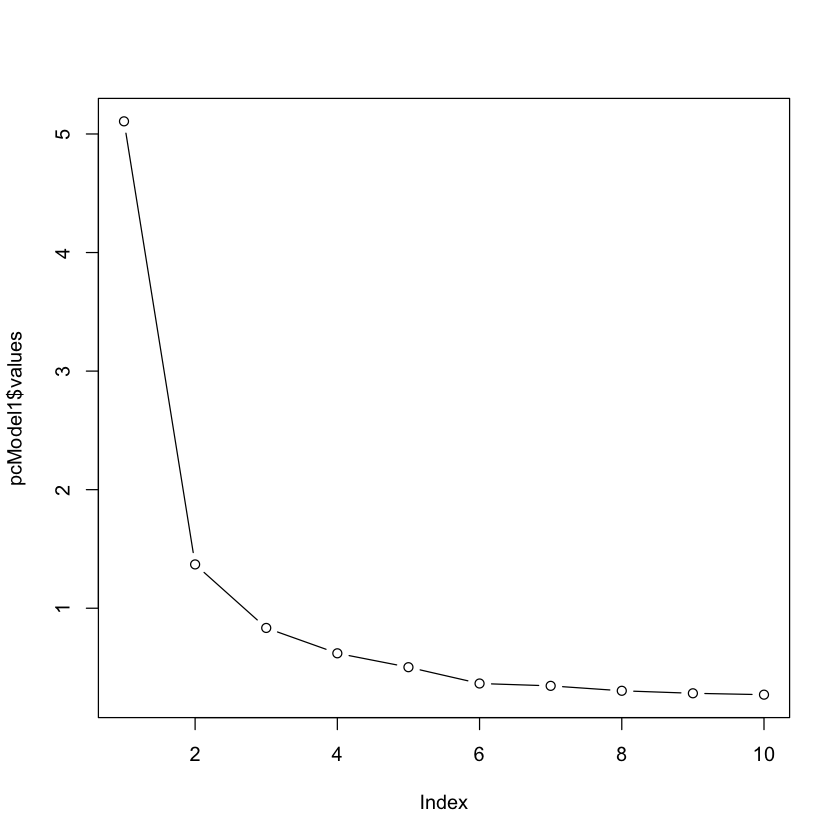

In [16]:
## Based on teh SS Loadings, there are probably 2 factors here 
### Examine the scree plot
plot(pcModel1$values, type="b")
### It confirms 2

What you are looking for on this graph is when the plot seems to break or shear off.  The name "scree plot" comes from the geology world, where scree means falling rocks off a cliff. In this case, you can see that there is quite a jump down between 1 and 2, and another not-quite-so-large jump down between 2 and 3. The rest really seem to trail off after that. This info, along with examining the eigenvalues, tells us that probably there are two factors.  So you can now test that assumption, to see if the model fit improves with two factors.

---

## Second Pass to Test the Suspected Number of Factors

Now, you'll run similar code again, but this time, you will change ```nfactors=``` to 2 instead of 10: 

```{r}
pcModel2 <- principal(financialWB1, nfactors = 2, rotate = "none")
```

---


In [34]:
pcModel2 <- principal(FWB1, nfactors = 2, rotate = "none") 
pcModel2


Principal Components Analysis
Call: principal(r = FWB1, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   h2   u2 com
FS1_1  0.84 -0.02 0.70 0.30 1.0
FS1_2  0.75  0.04 0.57 0.43 1.0
FS1_3  0.80 -0.25 0.70 0.30 1.2
FS1_4  0.83 -0.18 0.72 0.28 1.1
FS1_5  0.77 -0.21 0.64 0.36 1.2
FS1_6  0.75  0.08 0.57 0.43 1.0
FS1_7  0.79  0.02 0.62 0.38 1.0
FS2_1  0.54  0.61 0.67 0.33 2.0
FS2_2  0.53  0.67 0.73 0.27 1.9
FS2_3 -0.40  0.63 0.56 0.44 1.7

                       PC1  PC2
SS loadings           5.11 1.37
Proportion Var        0.51 0.14
Cumulative Var        0.51 0.65
Proportion Explained  0.79 0.21
Cumulative Proportion 0.79 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.08 
 with the empirical chi square  3515.18  with prob <  0 

Fit based upon off diagonal values = 0.97

In [35]:
### But try 3 also because it was > 50%
pcModel3 <- principal(FWB1, nfactors = 3, rotate = "none") 
pcModel3

Principal Components Analysis
Call: principal(r = FWB1, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   h2   u2 com
FS1_1  0.84 -0.02  0.24 0.76 0.24 1.2
FS1_2  0.75  0.04 -0.12 0.58 0.42 1.1
FS1_3  0.80 -0.25 -0.16 0.73 0.27 1.3
FS1_4  0.83 -0.18 -0.08 0.73 0.27 1.1
FS1_5  0.77 -0.21 -0.24 0.69 0.31 1.4
FS1_6  0.75  0.08  0.47 0.80 0.20 1.7
FS1_7  0.79  0.02  0.43 0.81 0.19 1.6
FS2_1  0.54  0.61 -0.26 0.74 0.26 2.3
FS2_2  0.53  0.67 -0.28 0.81 0.19 2.3
FS2_3 -0.40  0.63  0.33 0.67 0.33 2.3

                       PC1  PC2  PC3
SS loadings           5.11 1.37 0.83
Proportion Var        0.51 0.14 0.08
Cumulative Var        0.51 0.65 0.73
Proportion Explained  0.70 0.19 0.11
Cumulative Proportion 0.70 0.89 1.00

Mean item complexity =  1.6
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with the empirical chi square  2353.55  with prob <  0 

Fit

### Examining Residuals to Determine Model Fit

You don't really need to even examine the output right now, but you will use the new model generated, ```pcModel2```, to examine model fit through the residuals. The basic idea behind this test is that the model fits your data very well if there is very little difference between the correlation matrix and the loadings generated through your model.  The difference between them is known as the *residual*. A general rule of thumb is that you have good model fit if the percentage of large residuals (over .05) is less than 50%.  In order to make all this easier, you will go through a series of steps.  The first line creates your residuals, using the ```factor.residuals()``` function.  The argument it takes are your correlation matrix and the loadings from your most recent factor analysis model.

In [36]:
residuals <- factor.residuals(FWBmatrix, pcModel3$loadings) 

In [37]:
residuals <- as.matrix(residuals[upper.tri(residuals)]) 

The second line formats the residuals as a matrix using the function ```as.matrix()```, and keeps only the top half (remember, the top triangle and bottom triangle mirror each other), using the function ```upper.tri()```. 

In [38]:
largeResid <- abs(residuals) > .05

The next line will find only the large residuals values and put them in a new variable named ```largeResid```.  This uses the ```abs()``` function to take the absolute value, and qualifies a large residual as > .05:

In [39]:
sum(largeResid)

[1] 15

Then you can find the number of residuals that are large by using the ```sum()``` function:

In [40]:
sum(largeResid/nrow(residuals))

[1] 0.3333333

And lastly, you can get the percentage of residuals that are large as compared to the total number of rows, by using the ```sum()``` function on ```largeResid``` divided by the number of rows in the residuals you generated, using the ```nrow()``` function.

When you go through this, you find that the final output is: 

```text
[1] 0.333333333333333
```

Meaning that 33% of residuals are large.  This is under 50%, so having only three factors is a pretty good model fit for the data.

## Rotate the Factors to Determine Where Each Survey Item Fits

You will now play around with rotating the factors, to see where each survey item fits.  You will mostly likely try multiple rotations, and you may even try them with different numbers of factors as well if you think the results above may point to a few different numbers.

In [41]:
### That actually looks much betier - so you may want to interpret with 2 or with 3 
print.psych(pcModel3, cut = .3, sort=TRUE)

Principal Components Analysis
Call: principal(r = FWB1, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PC1   PC2   PC3   h2   u2 com
FS1_1    1  0.84             0.76 0.24 1.2
FS1_4    4  0.83             0.73 0.27 1.1
FS1_3    3  0.80             0.73 0.27 1.3
FS1_7    7  0.79        0.43 0.81 0.19 1.6
FS1_5    5  0.77             0.69 0.31 1.4
FS1_2    2  0.75             0.58 0.42 1.1
FS1_6    6  0.75        0.47 0.80 0.20 1.7
FS2_2    9  0.53  0.67       0.81 0.19 2.3
FS2_3   10 -0.40  0.63  0.33 0.67 0.33 2.3
FS2_1    8  0.54  0.61       0.74 0.26 2.3

                       PC1  PC2  PC3
SS loadings           5.11 1.37 0.83
Proportion Var        0.51 0.14 0.08
Cumulative Var        0.51 0.65 0.73
Proportion Explained  0.70 0.19 0.11
Cumulative Proportion 0.70 0.89 1.00

Mean item complexity =  1.6
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with 

In [42]:
print.psych(pcModel2, cut = .3, sort=TRUE)

Principal Components Analysis
Call: principal(r = FWB1, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PC1   PC2   h2   u2 com
FS1_1    1  0.84       0.70 0.30 1.0
FS1_4    4  0.83       0.72 0.28 1.1
FS1_3    3  0.80       0.70 0.30 1.2
FS1_7    7  0.79       0.62 0.38 1.0
FS1_5    5  0.77       0.64 0.36 1.2
FS1_2    2  0.75       0.57 0.43 1.0
FS1_6    6  0.75       0.57 0.43 1.0
FS2_2    9  0.53  0.67 0.73 0.27 1.9
FS2_3   10 -0.40  0.63 0.56 0.44 1.7
FS2_1    8  0.54  0.61 0.67 0.33 2.0

                       PC1  PC2
SS loadings           5.11 1.37
Proportion Var        0.51 0.14
Cumulative Var        0.51 0.65
Proportion Explained  0.79 0.21
Cumulative Proportion 0.79 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.08 
 with the empirical chi square  3515.18  with prob <  0 

Fit based upon off diagonal values = 0.97

### Oblique Rotation

You will now run your model a third time, but using the argument ```rotate="oblimin"```.  Oblimin is the most commonly used type of oblique rotation, and you'll start with it because it's assumed that these survey items are conceptually related to each other.  They are, after all, all about financial well-being. Keep the number of factors as two (```nfactors=2```), because an examination of residuals showed that it was a good fit for the data.

In [46]:
#### Try with some different rotations
pcModel4 <- principal(FWB2, nfactors = 3, rotate = "oblimin") 
print.psych(pcModel4, cut=.3, sort=FALSE)

Principal Components Analysis
Call: principal(r = FWB2, nfactors = 3, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
        TC1   TC3   TC2   h2   u2 com
FS1_1        0.65       0.76 0.24 1.4
FS1_2  0.59             0.60 0.40 1.4
FS1_3  0.87             0.77 0.23 1.0
FS1_4  0.77             0.77 0.23 1.1
FS1_5  0.93             0.77 0.23 1.0
FS1_6        0.95       0.83 0.17 1.0
FS1_7        0.87       0.81 0.19 1.0
FS2_1              0.87 0.78 0.22 1.0
FS2_2              0.91 0.82 0.18 1.0

                       TC1  TC3  TC2
SS loadings           2.87 2.33 1.71
Proportion Var        0.32 0.26 0.19
Cumulative Var        0.32 0.58 0.77
Proportion Explained  0.41 0.34 0.25
Cumulative Proportion 0.41 0.75 1.00

 With component correlations of 
     TC1  TC3  TC2
TC1 1.00 0.62 0.38
TC3 0.62 1.00 0.41
TC2 0.38 0.41 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RM

You now have access to what is called a *pattern matrix*, and the print outs in the columns ```TC1``` and ```TC2``` tell you how well each item fits into that factor.  The values can range from 0 to 1, and the larger the value, the better the fit.  If you want to examine the output all at once, it can be handy to put it into a spreadsheet or print it out and highlight the values that load highly.  What is meant by loading highly? Your exact cutoff will determine how your data looks, but generally anything above .3 - .4 loads on that factor ok. 





Luckily this is pretty cut and dry in ths example, but sometimes you will find that things load relatively highly on more than one factor and you have to make the best decision you can. There is a lot of subjective judgement in factor analysis. 

When you examine the actual items and what the questions are asking you find that factor 1, ```TC1```, is all about the negative side of financial well being - not having enough money or not being in control of your finances.  The second factor, ```TC2```, looks like it is the opposite - about being good with money management. 

Now that process wasn't too bad with a small number of factors and a small number of survey items, but what if you had more? Then it would become a much larger task and a bit of a pain.  Happily, the ```psych``` package swoops in to save the day and make your life easier! The line of code below will print out only the loadings that are higher than .3, and sorts them from largest to smallest.

In [44]:
pcModel5 <- principal(FWB2, nfactors = 3, rotate = "varimax") 
print.psych(pcModel5, cut=.3, sort=FALSE)

Principal Components Analysis
Call: principal(r = FWB2, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       RC1  RC3  RC2   h2   u2 com
FS1_1 0.49 0.69      0.76 0.24 2.0
FS1_2 0.63 0.31 0.34 0.60 0.40 2.1
FS1_3 0.82           0.77 0.23 1.3
FS1_4 0.78 0.38      0.77 0.23 1.5
FS1_5 0.84           0.77 0.23 1.2
FS1_6      0.86      0.83 0.17 1.3
FS1_7 0.34 0.82      0.81 0.19 1.4
FS2_1           0.85 0.78 0.22 1.2
FS2_2           0.87 0.82 0.18 1.1

                       RC1  RC3  RC2
SS loadings           2.86 2.31 1.75
Proportion Var        0.32 0.26 0.19
Cumulative Var        0.32 0.57 0.77
Proportion Explained  0.41 0.33 0.25
Cumulative Proportion 0.41 0.75 1.00

Mean item complexity =  1.4
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with the empirical chi square  1563.67  with prob <  0 

Fit based upon off diagonal values = 0.99